# OPTIMIZATION THEORY - HOMEWORK PROBLEM SET #2
202060410 정순규

## import numpy and matplotlib


In [9]:
import numpy as np
import matplotlib.pyplot as plt

## import symbols and functions from local files


In [10]:
from linalg import Vector, Matrix
from steepest_descent import sda

## Problem 2

### define an objective function $f(x)$ and its gradient $\nabla f(x)$
$f(x)=\frac{1}{2}x^TQx+c^Tx$

$\nabla f(x)=Qx+c$

In [11]:
Q = Matrix([
	[10, -18, 2],
	[-18, 40, -1],
	[2, -1, 3]
])
c = Vector([12, -47, -8])
f1 = lambda x: 0.5 * x.T @ Q @ x + c @ x
gradf1 = lambda x: Q @ x + c

### minimize $f(x)$ starting from various points $x_0$


sda: status=0, x0=[0 0 0], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=104
sda: status=0, x0=[15.09  7.66 -6.56], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=311
sda: status=0, x0=[11.77  6.42 -4.28], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=88
sda: status=0, x0=[4.46 2.25 1.85], xopt=[4. 3. 1.], fval_opt=-50.5, num_iter=58


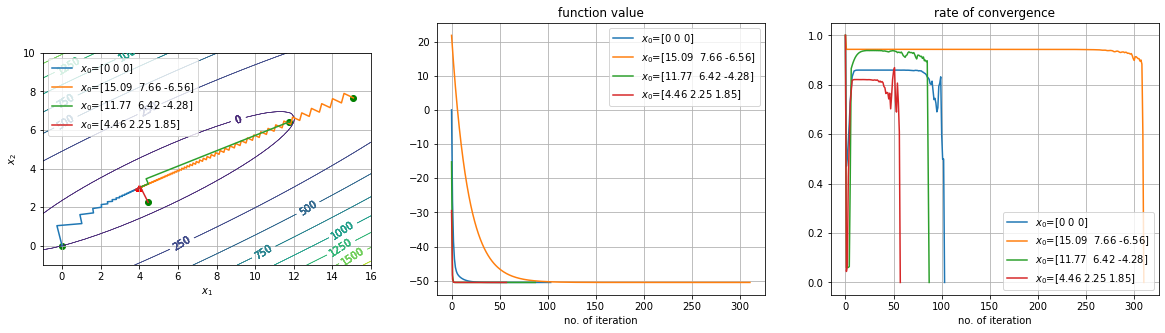

In [12]:
fig, ax = plt.subplots(1,3, figsize=(20,5)) # create a figure and an axes of matplotlib
ax[0].set_aspect(1.0)
ax[0].grid(True)
x = np.linspace(-1,16,100)
y = np.linspace(-1,10,50)
[xx, yy] = np.meshgrid(x, y)
zz = np.zeros_like(xx)
for i in range(len(x)):
	for j in range(len(y)):
		zz[j,i] = f1(Vector((x[i],y[j],0)))
ax[0].set_xlabel('$x_1$')
ax[0].set_ylabel('$x_2$')
ax[1].grid(True)
ax[1].set_title('function value')
ax[1].set_xlabel('no. of iteration')
ax[2].grid(True)
ax[2].set_xlabel('no. of iteration')
ax[2].set_title('rate of convergence')

for x0 in [ # iterate with four different starting points
	Vector([0, 0, 0]),
	Vector([15.09, 7.66, -6.56]),
	Vector([11.77, 6.42, -4.28]),
	Vector([4.46, 2.25, 1.85])
]:
	# minimize f(x) using the steepest descent algorithm
	# sda() function description
	# 1. input arguments
	# 	- f1: an objective function f(x) (function)
	# 	- gradf1: the gradient of f(x) (function)
	# 	- x0: a starting point of optimization which is sequencially input by "for loop" (Vector = numpy.ndarray)
	# 	- epsilon: the first stopping criteria. sda() will stop if |gradf(xk)| <= epsilon. (float)
	# 	- max_num_iter: the second stopping criteria. sda() will stop if the number of iterations is greater than max_num_iter. (integer)
	# 2. return values
	# 	- xopt: the minimizer of f(x) (Vector = numpy.ndarray)
	# 	- fval_opt: the minimum of f(x) (float)
	# 	- status: 0 if the minimum is found within max_num_iter, 1 if the number of iterations reaches max_num_iter. (integer)
	# 	- history: sequencially stored values of x, d, fval, rate_conv (dictionary)
	xopt, fval_opt, status, history = sda(f1, gradf1, x0, epsilon=1e-3, max_num_iter=1000)

	# print return values and actual number of iterations
	print(f"sda: {status=}, x0={np.round(x0,2)}, xopt={np.round(xopt,2)}, fval_opt={np.round(fval_opt,2)}, num_iter={len(history['x'])}")

	# plot f(x), xopt and search path (2D projection only)
	cnt = ax[0].contour(xx, yy, zz, linewidths=0.5)
	ax[0].clabel(cnt, fmt='%.0f')
	ax[0].plot(history['x'][:,0], history['x'][:,1], label=f'$x_0$={x0}')
	ax[0].scatter(history['x'][0,0], history['x'][0,1], color='green')
	ax[0].scatter(history['x'][-1,0], history['x'][-1,1], marker='^', color='red')
	ax[1].plot(history['fval'], label=f'$x_0$={x0}')
	ax[2].plot(history['rate_conv'], label=f'$x_0$={x0}')

ax[0].legend(loc='upper left')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
plt.show()

## Problem 3

### define an objective function $f(x)$ and its gradient $\nabla f(x)$
$f(x_1,x_2;\theta)=-9x_1-10x_2+\theta(-\ln(100-x_1-x_2)-\ln(x_1)-\ln(x_2)-\ln(50-x_1+x_2))$

$\nabla f(x_1,x_2;\theta)=\begin{bmatrix}-9+\theta\left(\frac{1}{100-x_1-x_2}-\frac{1}{x_1}+\frac{1}{50-x_1+x_2}\right)\\-10+\theta\left(\frac{1}{100-x_1-x_2}-\frac{1}{x_x}-\frac{1}{50-x_1+x_2}\right)\end{bmatrix}$

### $\epsilon$ is introduced to prevent $\ln(0)$.

In [13]:
eps = 1e-3
log_eps = lambda x: np.log(max(x,eps))
f2 = lambda x,th: -9*x[0]-10*x[1]+th*(-log_eps(100-x[0]-x[1])-log_eps(x[0])-log_eps(x[1])-log_eps(50-x[0]+x[1]))
gradf2 = lambda x,th: np.array([
    -9+th*(1/(100-x[0]-x[1])-1/x[0]+1/(50-x[0]+x[1])),
    -10+th*(1/(100-x[0]-x[1])-1/x[1]-1/(50-x[0]+x[1]))
])


### $f(x)$ without $\epsilon$ for plotting proper contour

In [14]:
f2_no_eps = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1]))

### define a function to calculate $\alpha_{max}$
$\alpha_{max}$ can be determined by inequality equations:

$x_1+\alpha d_1>0$<br>
$x_2+\alpha d_2>0$<br>
$x_1+\alpha d_1+x_2+\alpha d_2<100$<br>
$x_1+\alpha d_1-x_2-\alpha d_2<50$

For example, in the first inequality, $\alpha$ is limited by $-d_1/x_1$ only when $d_1$ is negative. And by the third inequality, $\alpha$ should be less then $(100-x_1-x_2)/(d_1+d_2)$ only if $d_1+d_2>0$. Therefore,

$\alpha<-x_1/d_1$ if $d_1<0$<br>
$\alpha<-x_2/d_2$ if $d_2<0$<br>
$\alpha<(100-x_1-x_2)/(d_1+d_2)$ if $d_1+d_2>0$<br>
$\alpha<(50-x_1+x_2)/(d_1-d_2)$ if $d_1-d_2>0$.

In [15]:
def calc_alpha_max(x, d):
    alpha_max = 150
    if d[0] < 0:
        alpha_max = min(alpha_max, -x[0] / d[0])
    if d[1] < 0:
        alpha_max = min(alpha_max, -x[1] / d[1])
    if d[0] + d[1] > 0:
        alpha_max = min(alpha_max, (100 - x[0] - x[1]) / (d[0] + d[1]))
    if d[0] - d[1] > 0:
        alpha_max = min(alpha_max, (50 - x[0] + x[1]) / (d[0] - d[1]))
    return alpha_max

### minimize $f(x)$ starting from various points $x_0$


th = 10 -----
sda: status=0, x0=[ 8 90], xopt=[ 7.94 91.08], fval_opt=-1096.81, num_iter=4


<ipython-input-14-906f0b32a01b>:1: RuntimeWarning: invalid value encountered in log
  f2_no_eps = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1]))
<ipython-input-14-906f0b32a01b>:1: RuntimeWarning: divide by zero encountered in log
  f2_no_eps = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1]))


sda: status=0, x0=[ 1 40], xopt=[ 7.93 91.09], fval_opt=-1096.81, num_iter=448
sda: status=0, x0=[15.   68.69], xopt=[ 7.94 91.08], fval_opt=-1096.81, num_iter=14
sda: status=0, x0=[10 20], xopt=[ 7.93 91.09], fval_opt=-1096.81, num_iter=18
th = 100 -----
sda: status=0, x0=[ 8 90], xopt=[22.28 69.7 ], fval_opt=-2298.41, num_iter=20
sda: status=0, x0=[ 1 40], xopt=[22.29 69.69], fval_opt=-2298.41, num_iter=100
sda: status=0, x0=[15.   68.69], xopt=[22.28 69.7 ], fval_opt=-2298.41, num_iter=12
sda: status=0, x0=[10 20], xopt=[22.28 69.69], fval_opt=-2298.41, num_iter=5


<ipython-input-14-906f0b32a01b>:1: RuntimeWarning: invalid value encountered in log
  f2_no_eps = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1]))
<ipython-input-14-906f0b32a01b>:1: RuntimeWarning: divide by zero encountered in log
  f2_no_eps = lambda x,th: -9*x[0]-10*x[1]+th*(-np.log(100-x[0]-x[1])-np.log(x[0])-np.log(x[1])-np.log(50-x[0]+x[1]))


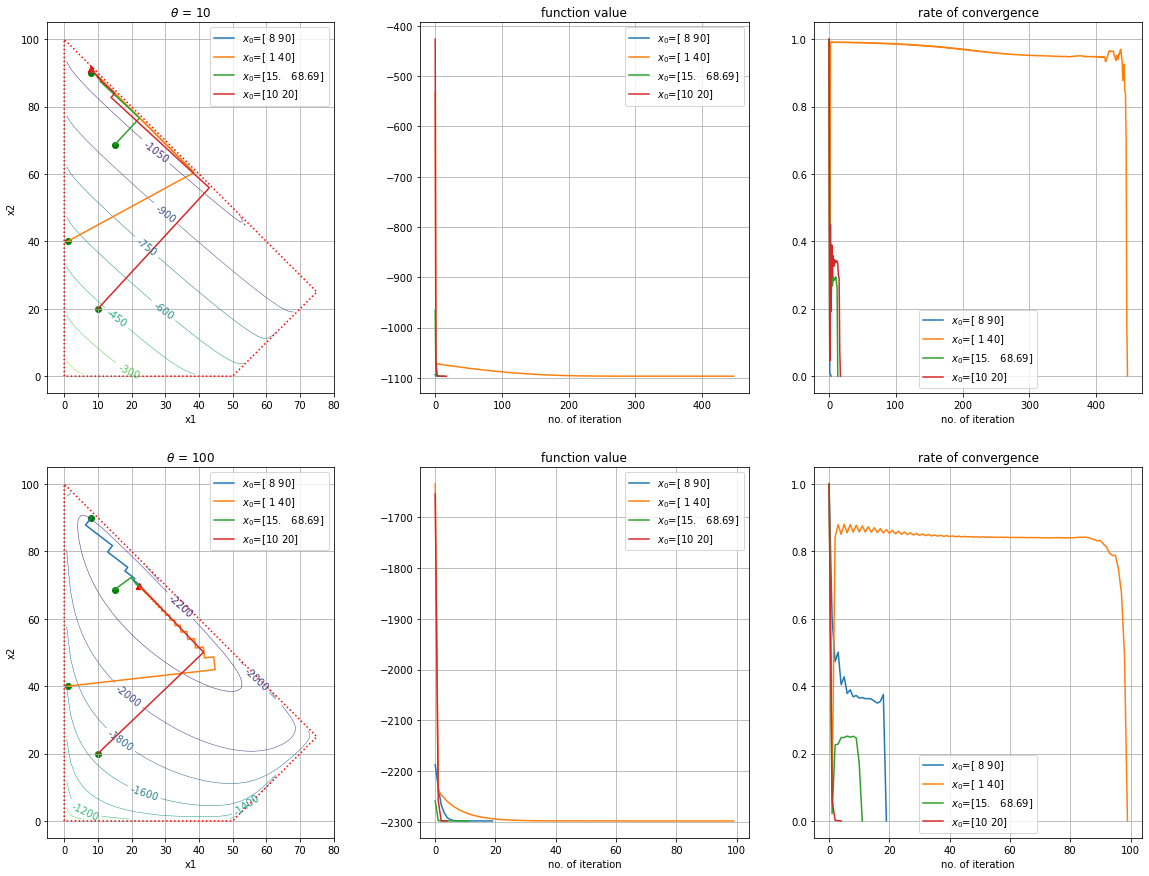

In [16]:
fig, ax = plt.subplots(2,3, figsize=(20,15))

for k, th in enumerate([10, 100]): # iterate with two different parameters
	print(f'th = {th} -----')

	f_th = lambda x: f2(x,th) # define a function of x only
	gradf_th = lambda x: gradf2(x,th)

	ax[k,0].set_aspect(1.0)
	ax[k,0].grid(True)
	x = np.linspace(-5,80,75)
	y = np.linspace(-5,105,100)
	[xx, yy] = np.meshgrid(x, y)
	zz = np.zeros_like(xx)
	for i in range(len(x)):
		for j in range(len(y)):
			zz[j,i] = f2_no_eps(Vector((x[i],y[j])),th) # f(x) without eps is used
	cnt = ax[k,0].contour(xx, yy, zz, linewidths=0.5)
	ax[k,0].clabel(cnt, fmt='%.0f')
	ax[k,0].plot([0, 0, 75, 50, 0], [0, 100, 25, 0, 0], linestyle='dotted', color='red') # draw the feasible region
	ax[k,0].set_title(r'$\theta$ = ' + f'{th}')
	ax[k,0].set_xlabel('x1')
	ax[k,0].set_ylabel('x2')
	ax[k,1].grid(True)
	ax[k,1].set_xlabel('no. of iteration')
	ax[k,1].set_title('function value')
	ax[k,2].grid(True)
	ax[k,2].set_xlabel('no. of iteration')
	ax[k,2].set_title('rate of convergence')

	for x0 in [ # iterate with four different starting points
		Vector([8, 90]),
		Vector([1, 40]),
		Vector([15, 68.69]),
		Vector([10, 20])
	]:
		xopt, fval_opt, status, history = sda(f_th, gradf_th, x0, epsilon=1e-3, max_num_iter=1000, alpha_max=calc_alpha_max, ls_epsilon=1e-6)

		print(f"sda: {status=}, x0={np.round(x0,2)}, xopt={np.round(xopt,2)}, fval_opt={np.round(fval_opt,2)}, num_iter={len(history['x'])}")

		ax[k,0].plot(history['x'][:,0], history['x'][:,1], label=f'$x_0$={x0}')
		ax[k,0].scatter(history['x'][0,0], history['x'][0,1], color='green')
		ax[k,0].scatter(history['x'][-1,0], history['x'][-1,1], marker='^', color='red')
		ax[k,1].plot(history['fval'], label=f'$x_0$={x0}')
		ax[k,2].plot(history['rate_conv'], label=f'$x_0$={x0}')

for k in range(2):
	ax[k,0].legend(loc='upper right')
	ax[k,1].legend(loc='best')
	ax[k,2].legend(loc='best')

plt.show()